# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Data Inspection

In [2]:
# load data into dataframe
df = pd.read_csv('data.csv')

# inspect top few rows
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
# make column names consistent
df.columns = df.columns.str.replace('_','')

In [4]:
# get a summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Administrative          12330 non-null  int64  
 1   AdministrativeDuration  12330 non-null  float64
 2   Informational           12330 non-null  int64  
 3   InformationalDuration   12330 non-null  float64
 4   ProductRelated          12330 non-null  int64  
 5   ProductRelatedDuration  12330 non-null  float64
 6   BounceRates             12330 non-null  float64
 7   ExitRates               12330 non-null  float64
 8   PageValues              12330 non-null  float64
 9   SpecialDay              12330 non-null  float64
 10  Month                   12330 non-null  object 
 11  OperatingSystems        12330 non-null  int64  
 12  Browser                 12330 non-null  int64  
 13  Region                  12330 non-null  int64  
 14  TrafficType             12330 non-null

- There are 12,330 records and 18 columns in the dataset
- There are no mising values  
  
Some numerical columns are supposed to be categories. According to the data description, there are 10 numerical and 8 categorical attributes. Let's put each column in their correct data types

In [5]:
# create lists of categorical from numerical columns
cat_cols = df.columns[-8:]
num_cols = df.columns[:10]

# convert Weekend and Revenue values to binary
df[['Weekend','Revenue']] = df[['Weekend','Revenue']].astype('int8')

# convert categorical columns to category data type
for col in cat_cols:
    df[col] = df[col].astype('category')

# confirm changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Administrative          12330 non-null  int64   
 1   AdministrativeDuration  12330 non-null  float64 
 2   Informational           12330 non-null  int64   
 3   InformationalDuration   12330 non-null  float64 
 4   ProductRelated          12330 non-null  int64   
 5   ProductRelatedDuration  12330 non-null  float64 
 6   BounceRates             12330 non-null  float64 
 7   ExitRates               12330 non-null  float64 
 8   PageValues              12330 non-null  float64 
 9   SpecialDay              12330 non-null  float64 
 10  Month                   12330 non-null  category
 11  OperatingSystems        12330 non-null  category
 12  Browser                 12330 non-null  category
 13  Region                  12330 non-null  category
 14  TrafficType           

In [6]:
df.head()

,Administrative,AdministrativeDuration,Informational,InformationalDuration,ProductRelated,ProductRelatedDuration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,1,0


In [7]:
# get the description of the numerical columns
df.describe()

,Administrative,AdministrativeDuration,Informational,InformationalDuration,ProductRelated,ProductRelatedDuration,BounceRates,ExitRates,PageValues,SpecialDay
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000


In [9]:
# create train and test set
from sklearn.model_selection import train_test_split
train,test = train_test_split(df,test_size=0.25,random_state=42)

# reset indices
train.reset_index(drop=True,inplace=True)
test.reset_index(drop=True,inplace=True)

# Exploratory Data Analysis

In [10]:
# create a copy of the data for exploration
shopping = df.copy()

# Revenue

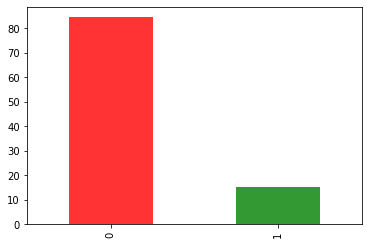

In [11]:
(shopping.Revenue.value_counts(normalize=True)*100).plot.bar(color=['red','green'],alpha=.8);

Less than **20 percent** of the site visitors finalized a transaction

In [12]:
# create a dataframe of visitors who finalized a transaction
purchased = shopping[shopping.Revenue==1]

## Weekend

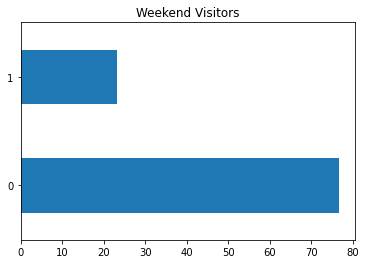

In [13]:
(shopping.Weekend.value_counts(normalize=True)*100).plot.barh()
plt.title('Weekend Visitors');

Around **25 percent** of  the visitors visited the site on weekend

### What percentage of the purchases came from weekend visitors?

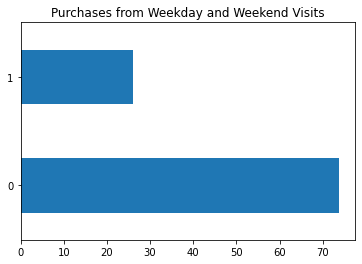

In [14]:
(purchased.Weekend.value_counts(normalize=True)*100).plot.barh()
plt.title('Purchases from Weekday and Weekend Visits');

Weekend visits resulted to around **a quarter** of the finalized transactions. This isn't suprising since the site recorded most visits on weekdays.

### What percentage of the weekend visitors finalized their transaction?

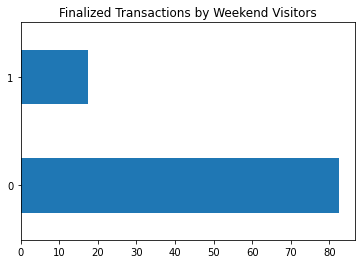

In [15]:
(shopping[shopping.Weekend==1].Revenue.value_counts(normalize=True)*100).plot.barh()
plt.title('Finalized Transactions by Weekend Visitors');

About **18 percent** of the weekend visitors finalized their transactions

## Visitor Type

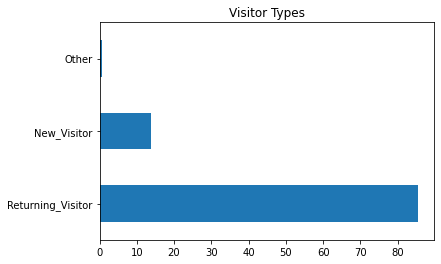

In [16]:
(shopping.VisitorType.value_counts(normalize=True)*100).plot.barh()
plt.title('Visitor Types');

Over **80 percent** of  the visitors were returning visitors

### What percentage of the purchases came from each visitor type?

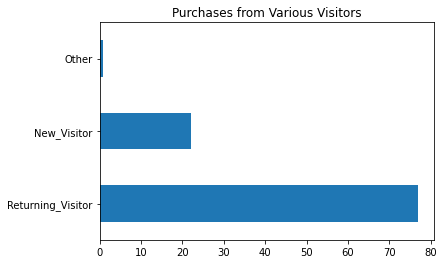

In [17]:
(purchased.VisitorType.value_counts(normalize=True)*100).plot.barh()
plt.title('Purchases from Various Visitors');

Returning visitors account for about **80 percent** of the finalized transactions

### What is the percentage of finalized transactions for each visitor type ?

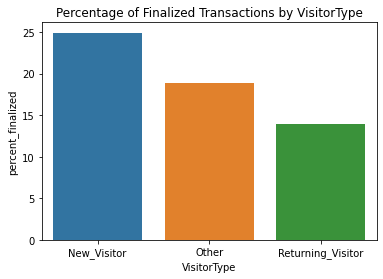

In [18]:
visitor_type=pd.crosstab(index=shopping.VisitorType,columns=shopping.Revenue).reset_index()
visitor_type['percent_finalized']=visitor_type.apply(lambda x: x[1]*100/(x[1]+x[0]),axis=1)
sns.barplot(x='VisitorType',y='percent_finalized',data=visitor_type)
plt.title('Percentage of Finalized Transactions by VisitorType');

Out of the three visitor types, a larger percentage of new visitors finalized their transactions

## Traffic Type

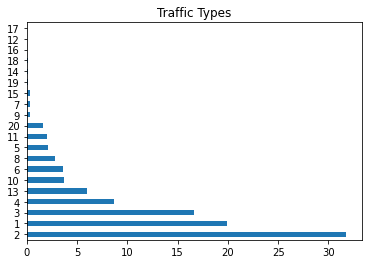

In [19]:
(shopping.TrafficType.value_counts(normalize=True)*100).plot.barh()
plt.title('Traffic Types');

Most of  the visitors arrived the website through traffic type 2

### What percentage of the purchases came from each traffic type?

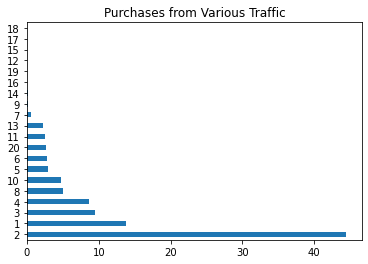

In [20]:
(purchased.TrafficType.value_counts(normalize=True)*100).plot.barh()
plt.title('Purchases from Various Traffic');

Traffic Type 2 accounts for over **40 percent** of the finalized transactions

### What is the percentage of finalized transactions for each traffic type?

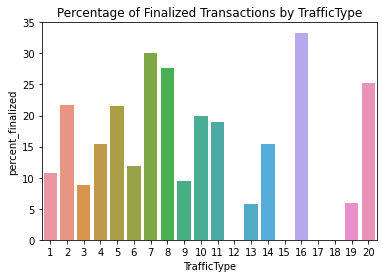

In [21]:
traffic_type=pd.crosstab(index=shopping.TrafficType,columns=shopping.Revenue).reset_index()
traffic_type['percent_finalized']=traffic_type.apply(lambda x: x[1]*100/(x[1]+x[0]),axis=1)
sns.barplot(x='TrafficType',y='percent_finalized',data=traffic_type)
plt.title('Percentage of Finalized Transactions by TrafficType');

Out of all traffic types, a larger percentage of type 16 visitors finalized their transactions. Traffic Types 12, 15, 17, and 18 have almost no finalized transactions

## Region

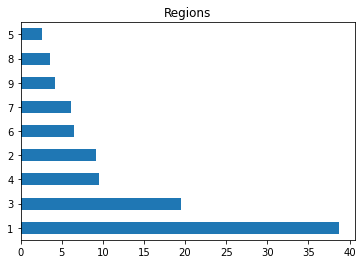

In [22]:
(shopping.Region.value_counts(normalize=True)*100).plot.barh()
plt.title('Regions');

About **40 percent** of  the visitors came from **region 1**

### What percentage of the purchases came from each region?

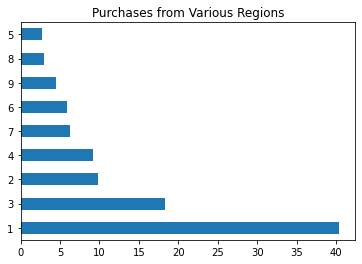

In [23]:
(purchased.Region.value_counts(normalize=True)*100).plot.barh()
plt.title('Purchases from Various Regions');

Region 1 accounts for about **40 percent** of the finalized transactions

### What is the percentage of finalized transactions for each region?

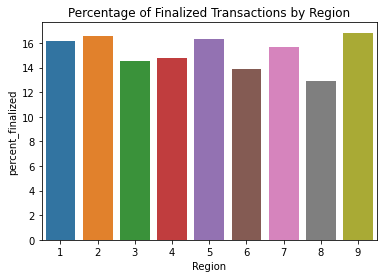

In [24]:
region=pd.crosstab(index=shopping.Region,columns=shopping.Revenue).reset_index()
region['percent_finalized']=region.apply(lambda x: x[1]*100/(x[1]+x[0]),axis=1)
sns.barplot(x='Region',y='percent_finalized',data=region)
plt.title('Percentage of Finalized Transactions by Region');

The regions have almost equal percentage of finalized transactions

## Browser

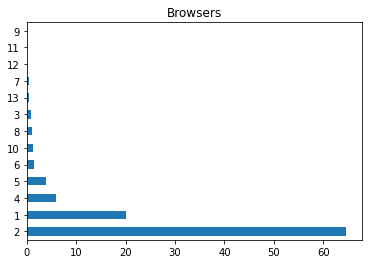

In [25]:
(shopping.Browser.value_counts(normalize=True)*100).plot.barh()
plt.title('Browsers');

Over **60 percent** of  the visitors accessed the website with browser 2

### What percentage of the purchases came from each browser?

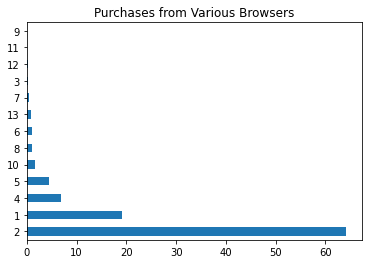

In [26]:
(purchased.Browser.value_counts(normalize=True)*100).plot.barh()
plt.title('Purchases from Various Browsers');

Over **60 percent** of the finalized transactions were made from browser 2

### What is the percentage of finalized transactions for each browser?

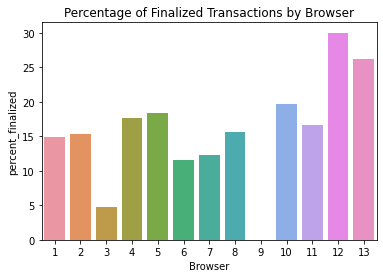

In [27]:
browser=pd.crosstab(index=shopping.Browser,columns=shopping.Revenue).reset_index()
browser['percent_finalized']=browser.apply(lambda x: x[1]*100/(x[1]+x[0]),axis=1)
sns.barplot(x='Browser',y='percent_finalized',data=browser)
plt.title('Percentage of Finalized Transactions by Browser');

Even though plenty of the visitors accessed the site with browser 2, only about 15 percent finalized their transactions. Browsers 12 and 13 have the largest completion rates

## Operating Systems

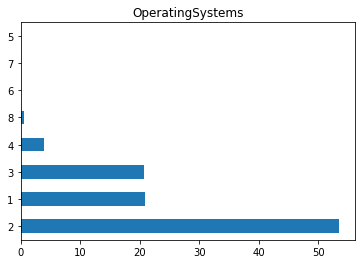

In [28]:
(shopping.OperatingSystems.value_counts(normalize=True)*100).plot.barh()
plt.title('OperatingSystems');

Over **60 percent** of  the visitors accessed the website with **Operating System 2**

### What percentage of the purchases came from each region?

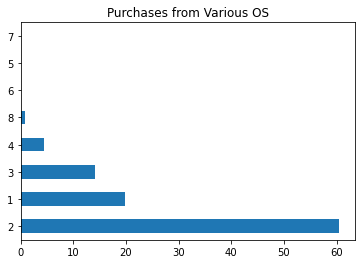

In [29]:
(purchased.OperatingSystems.value_counts(normalize=True)*100).plot.barh()
plt.title('Purchases from Various OS');

OS 8 accounts for about **60 percent** of the finalized transactions

### What is the percentage of finalized transactions for each operating system?

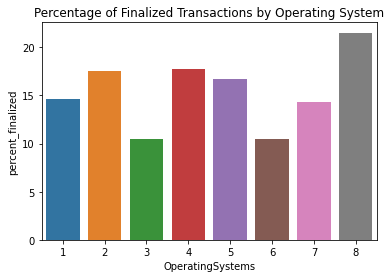

In [30]:
osys=pd.crosstab(index=shopping.OperatingSystems,columns=shopping.Revenue).reset_index()
osys['percent_finalized']=osys.apply(lambda x: x[1]*100/(x[1]+x[0]),axis=1)
sns.barplot(x='OperatingSystems',y='percent_finalized',data=osys)
plt.title('Percentage of Finalized Transactions by Operating System');

Over **20 percent** of the visits from Operating System 8 led to a finalized transaction. This is the most among the operating systems

## Month

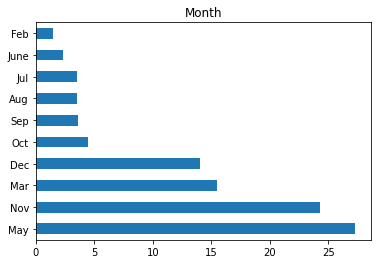

In [31]:
(shopping.Month.value_counts(normalize=True)*100).plot.barh()
plt.title('Month');

The website experienced more visits in **May and November** while the least traffic came in **February**

### What percentage of the purchases came from each month's visitors?

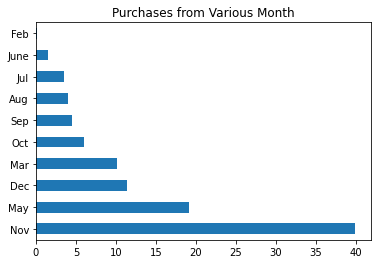

In [32]:
(purchased.Month.value_counts(normalize=True)*100).plot.barh()
plt.title('Purchases from Various Month');

Most of the sales came from **November's** traffic while there were almost no finalized transactions from february's visits

### What percentage of visitors for each month finalized their transactions?

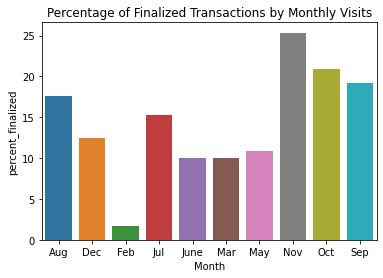

In [33]:
month=pd.crosstab(index=shopping.Month,columns=shopping.Revenue).reset_index()
month['percent_finalized']=month.apply(lambda x: x[1]*100/(x[1]+x[0]),axis=1)
sns.barplot(x='Month',y='percent_finalized',data=month)
plt.title('Percentage of Finalized Transactions by Monthly Visits');

**November** visitors have the highest percentage of finalized transactions

## Month and VisitorType

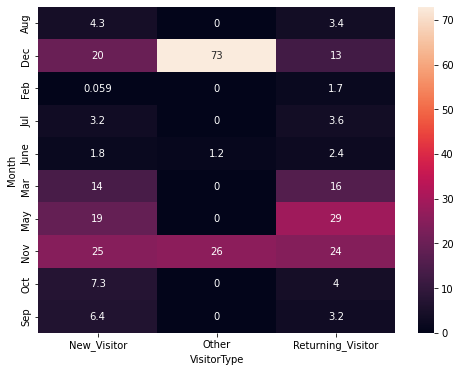

In [34]:
tab = pd.crosstab(index=shopping.Month,columns=shopping.VisitorType)
percentages = tab*100/tab.sum()
plt.figure(figsize=(8,6))
sns.heatmap(percentages,annot=True);

- There were more new visitors in November than every other month
- The site witnessed more uncategorized visitors in December than every other month
- Returning visitors tend to visit the website more frequently in May and November

## Weekend and VisitorType

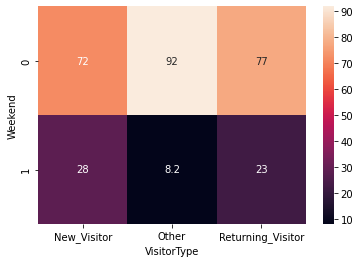

In [35]:
tab = pd.crosstab(index=shopping.Weekend,columns=shopping.VisitorType)
percentages = tab*100/tab.sum()
plt.figure(figsize=(6,4))
sns.heatmap(percentages,annot=True);

Most of the visitors accessed the website during weedays. This percentage is disproportionately high among uncategorized visitors

## OperatingSystems  and Browser

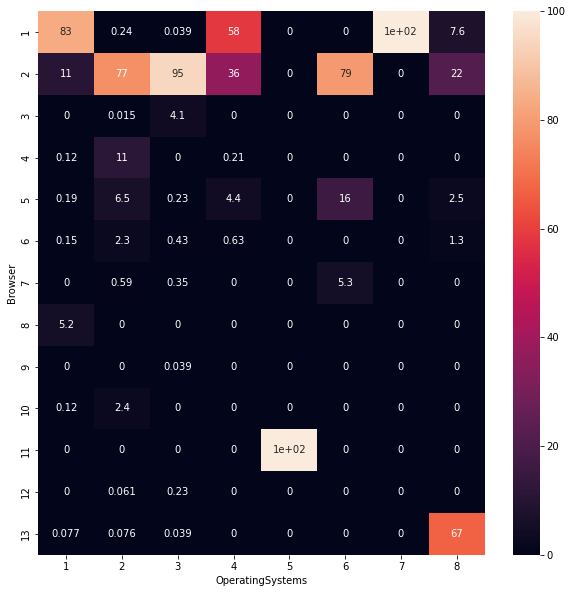

In [36]:
tab = pd.crosstab(index=shopping.Browser,columns=shopping.OperatingSystems)
percentages = tab*100/tab.sum()
plt.figure(figsize=(10,10))
sns.heatmap(percentages,annot=True);

- All the OS 7 users accessed the website with browser 1
- While most visitors accessed the website using browsers 1 and 2, OS 5 and 8 users were more inclined to using browsers 11 and 13 respectively

## Region and VisitorType

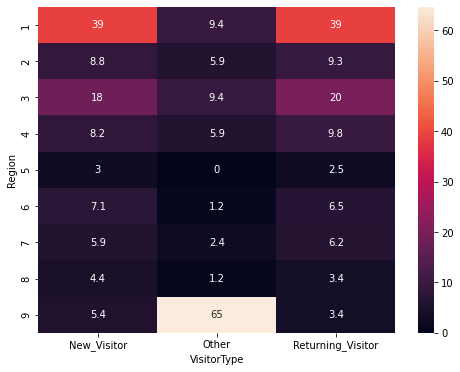

In [37]:
tab = pd.crosstab(index=shopping.Region,columns=shopping.VisitorType)
percentages = tab*100/tab.sum()
plt.figure(figsize=(8,6))
sns.heatmap(percentages,annot=True);

A large percentage of the uncategorized visitors came from region 9

## Numerical Columns

Wall time: 736 ms


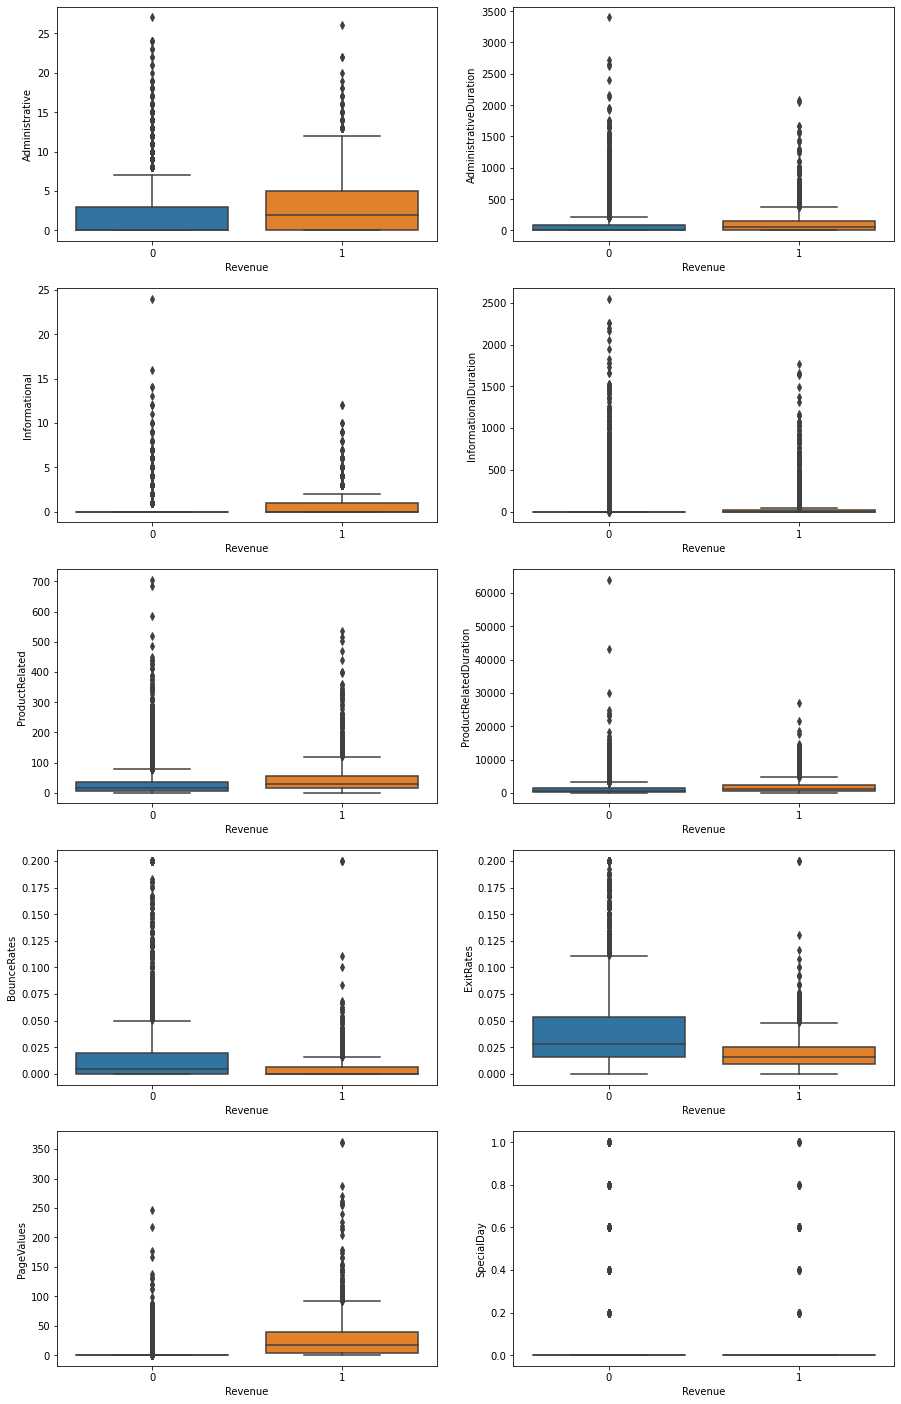

In [82]:
fig,ax = plt.subplots(5,2,figsize=(15,25));
for i in range(len(num_cols)):
    row = i//2
    col = i%2
    sns.boxplot(x='Revenue',y=num_cols[i],data=shopping,ax=ax[row,col])
    #ax[row,col].set_title(num_cols[i])
    #ax[row,col].set_xlabel('')
    #ax[row,col].set_ylabel('');

- Visitors who visited more administrative pages were more likely to finish a transaction
- Visitors who visited pages with high exit rates were unlikely to finish their transactions
- High value pages increase the likelihood of a visitor completing a transaction